In [1]:
import pandas as pd
import os
from scipy.stats import kstest,ttest_ind

# libraries related to plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.patches as mpatches
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
additive_file = "/data6/deepro/ukb_bmi/3_characterization/data/additive_test/british/train_cohort_pred.csv"
pheno_name = "bmi"
plot_df = pd.read_csv(additive_file).rename(columns={f"{pheno_name}": "Observed", f"{pheno_name}_pred": "Expected"}).melt(id_vars="sample_names")

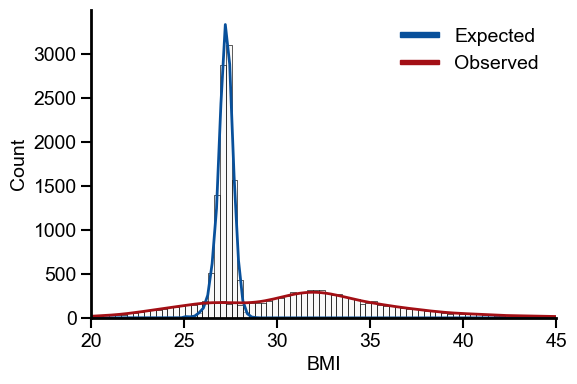

In [4]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

g = sns.histplot(
    data=plot_df, x='value', 
    hue='variable', hue_order=["Observed", "Expected"],
    edgecolor="k",
    linewidth=0.45,
    palette=["whitesmoke", "whitesmoke"], kde=True, # sns.color_palette("Reds", 15).as_hex()[7]
    element="bars", fill=True, bins=150, line_kws={"linewidth":2, "linestyle":"solid"}, legend=False,
    ax=ax)
g.axes.lines[1].set_color("#a30f15")
g.axes.lines[0].set_color("#08509b")

# kde = sns.kdeplot(
#     data=plot_df, x='value', hue='variable', 
#     hue_order=["Observed", "Expected"], 
#     palette=["#c1272d", "royalblue"], linewidth=5, fill=False, common_norm=False)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(20, 45)
g.set_xlabel("BMI")
# g.set_title('Expected vs Observed for Obesity Risk Combinations');
# g.set_ylim(-0.05, 1.05)
ax.spines[['right', 'top']].set_visible(False)

# legend
red_patch = mpatches.Patch(color='#a30f15', label='Observed')
blue_patch = mpatches.Patch(color='#08509b', label='Expected')
ax.legend(handles=[blue_patch, red_patch], handlelength=2, handleheight=0.001, frameon=False)

In [5]:
ttest_ind(plot_df.loc[plot_df.variable=="Expected", "value"], plot_df.loc[plot_df.variable=="Observed", "value"], alternative="less"), kstest(plot_df.loc[plot_df.variable=="Expected", "value"], plot_df.loc[plot_df.variable=="Observed", "value"], alternative="greater")

(TtestResult(statistic=-78.93202208040587, pvalue=0.0, df=20384.0),
 KstestResult(statistic=0.7133326792897086, pvalue=0.0, statistic_location=28.15022676285781, statistic_sign=1))

In [6]:
# read files
# get the samples who do not have a combo but has any of the gene mutations
# get their bmi residuals
# train a model to predict their bmi residuals based on the presence/absence of these genes
# predict the bmi residuals of the samples with combo
# compare predicted bmi residulas with observed residuals